In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#other depedendencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,10]

import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

In [0]:
#authentication
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
#get training data & test data

train_data = drive.CreateFile({'id':'1oCe012vMeB5CLQjJqLZZ-rqidJxT8oAC'})
train_data.GetContentFile('train.csv')

test_data = drive.CreateFile({'id':'1-gp-qCqBo__t1JQzl4SEC-NfzVR0ScTz'})
test_data.GetContentFile('test.csv')

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


Text(0,0.5,'number of training records')

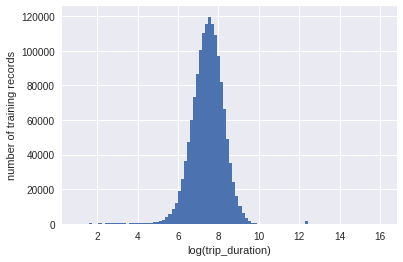

In [13]:
#data preprocessing

## measure average trip duration

df_train['log_trip_duration'] = np.log(df_train['trip_duration']).values + 1
plt.hist(df_train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of training records')


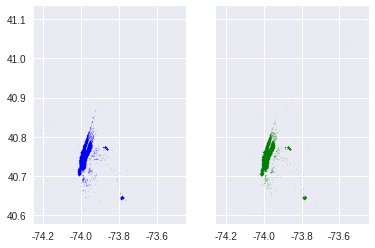

In [15]:
N = 10000
city_long_border = (-74, -74)
city_lat_border = (40, 40)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(df_train['pickup_longitude'].values[:N], 
              df_train['pickup_latitude'].values[:N], 
              color='blue', s=1, label='train', alpha=0.1)

ax[1].scatter(df_test['pickup_longitude'].values[:N], 
              df_test['pickup_latitude'].values[:N], 
              color='green', s=1, label='test', alpha=0.1)

plt.show()

In [0]:
#training model
feature_names = list(df_train.columns)
y = np.log(df_train['trip_duration'].values + 1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_train[feature_names].values, y, test_size=0.2, random_state=1987)

#this was further modified to participate in the kaggle challenge
xgb.XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.05).fit(Xtrain, Ytrain)
